## 🧠 Naïve Bayes vs. Optimal Bayes Classifier

### ✅ 1. Optimal Bayes Classifier
The **Optimal Bayes Classifier** uses **Bayes’ Theorem** with the *true* class-conditional distributions to make the best possible decision:

$$
\hat{y} = \arg\max_{y} P(y \mid x) = \arg\max_{y} \frac{P(x \mid y)\,P(y)}{P(x)}
$$

- 🔹 **Advantage:** Lowest achievable error rate (theoretical optimum)  
- 🔹 **Disadvantage:** Requires exact knowledge of $P(x \mid y)$ and $P(y)$, which is usually unknown or infeasible to compute.

---

### ✅ 2. Naïve Bayes Classifier
**Naïve Bayes** assumes the features are **conditionally independent** given the class:

$$
P(x_1, x_2, \dots, x_n \mid y) = \prod_{i=1}^{n} P(x_i \mid y)
$$

This simplification makes both training and inference fast and data-efficient.

- 🔹 **Advantages:**
  - Extremely fast training and prediction  
  - Performs well on small or high-dimensional datasets (e.g., text)  
  - Simple to implement and interpret  
- 🔹 **Disadvantages:**
  - Independence assumption is often violated  
  - Cannot model interactions between features  
  - May yield lower accuracy on datasets with strong feature dependencies

---

### 🔄 Why Choose Naïve Bayes over Optimal Bayes?
- True distributions $P(x \mid y)$ are generally unknown or too complex.  
- Collecting enough data for accurate estimation is impractical.  
- **Naïve Bayes** provides a *practical* and *efficient* alternative that often performs surprisingly well despite its simplifications.

---

### 💰 Trade-Off (Cost) of Using Naïve Bayes
- **Reduced accuracy** due to the independence assumption  
- **Missed correlations** between features  
- **Higher error rate** compared to the (unattainable) optimal classifier

---

### ✅ When Is Naïve Bayes a Good Choice?
- When the dataset is **small**, **sparse**, or **high-dimensional**  
- Applications such as:
  - **Spam filtering**  
  - **Sentiment analysis**  
  - **Text/document classification**  
- When **speed**, **simplicity**, and **interpretability** outweigh the need for maximum accuracy  
- When features are **approximately independent** or their dependencies have minimal impact
- In NLP, where words can often be treated independently


___

# Load the dataset

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from src.plot_decision_boundary import simple_plot_decision_boundary
from src.evaluate import calculate_metrics

First we load the Iris dataset:

In [30]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [4]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


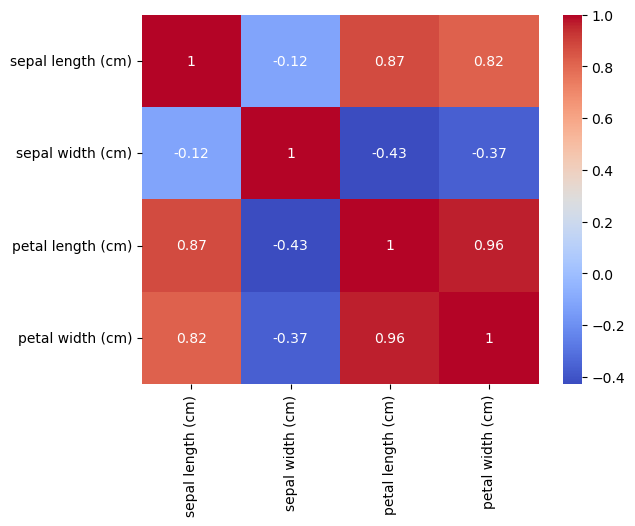

In [8]:
corr = df.corr()

sns.heatmap(data=corr, annot=True, cmap='coolwarm')
plt.show()

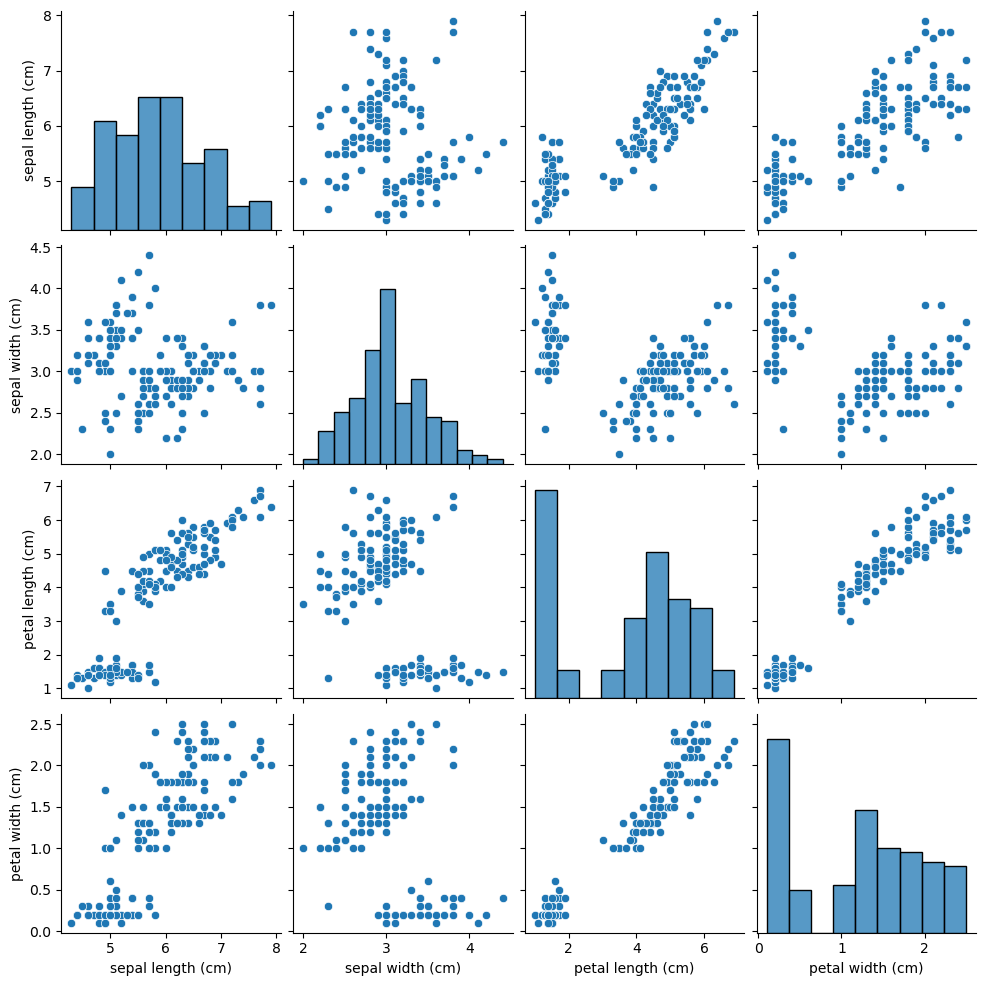

In [9]:
sns.pairplot(data=df, )
plt.show()

In [10]:
# Combine data and target
combined = np.column_stack((data.data, data.target))

In [11]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
columns = data.feature_names + ['target']

In [14]:
df_combined = pd.DataFrame(data=combined, columns=columns)

In [15]:
df_combined.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [16]:
df_combined.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2.0
141,6.9,3.1,5.1,2.3,2.0
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [17]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


We want to use petal length and width. So we drop the first and the second feature:

In [18]:
xs = data.data
xs = xs[:, 2:]
xs.shape

(150, 2)

In [19]:
data.target.shape

(150,)

In [20]:
xs = xs[data.target != 0]
ys = data.target[data.target != 0]

In [21]:
print('Shape of the inputs:', xs.shape)
print('Shape of the outputs:', ys.shape)

Shape of the inputs: (100, 2)
Shape of the outputs: (100,)


Now, lets plot the features:

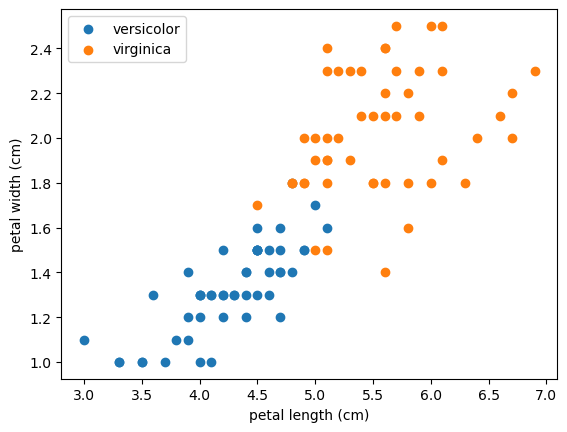

In [22]:
versi_data = xs[ys == 1]
virgini_data = xs[ys == 2]

plt.scatter(versi_data[:, 0], versi_data[:, 1], label=data.target_names[1])
plt.scatter(virgini_data[:, 0], virgini_data[:, 1], label=data.target_names[2])

plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])

plt.legend()
plt.show()


We see that the features are almost linearly seperable!

### Implementing Naive Bayes

In [23]:
class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.parameters = {}

    def fit(self, x, y):
        self.classes = np.unique(y)
        self.parameters = {}

        for c in self.classes:
            X_c = x[y == c]
            self.parameters[c] ={
                "mean": X_c.mean(axis=0),
                "var": X_c.var(axis=0),
                "prior": X_c.shape[0] / x.shape[0]
            }

    def log_gaussian_pdf(self, x, mean, var):
        eps = 1e-6
        var = var + eps
        log_coeff = -0.5 * np.log(2 * np.pi * var)
        log_exp = -0.5 * ((x - mean) ** 2) / var
        return log_coeff + log_exp

    def predict(self, X):
        preds = []
        for x in X:
            log_probs = []
            for c in self.classes:
                mean = self.parameters[c]["mean"]
                var = self.parameters[c]["var"]
                prior = self.parameters[c]["prior"]
                log_likelihood = self.log_gaussian_pdf(x, mean, var)
                total_log_likelihood = np.sum(log_likelihood)
                total_log_prob = np.log(prior) + total_log_likelihood
                log_probs.append(total_log_prob)
            preds.append(self.classes[np.argmax(log_probs)])
        return np.array(preds)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=42)

nb = NaiveBayesClassifier()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9


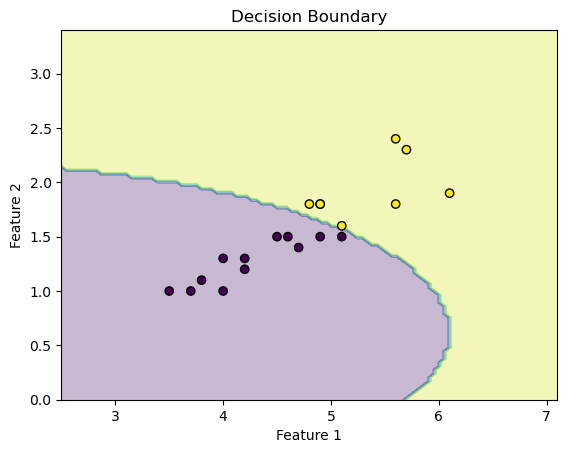

In [28]:
simple_plot_decision_boundary(nb, X_test, y_pred_nb)

We observe that the decision boundary is a second-degree polynomial and the data are well-seperated except few of them.

Now we can implement a function to calculate confusion matrix, accuracy and precision:

In [38]:
calculate_metrics(y_test - 1, y_pred_nb - 1)

{'confusion_matrix': array([[11,  1],
        [ 1,  7]]),
 'accuracy': 0.9,
 'precision': 0.875,
 'recall': 0.875,
 'f1_score': 0.875}

**Analysis of the Results**

The confusion matrix shows that the model correctly classified 11 samples from class 1 and 7 samples from class 2, making only two misclassifications (one false positive and one false negative). The overall accuracy is **90%**, indicating that 90% of all samples were correctly predicted.

Furthermore, both the precision and recall are **0.875**, meaning the model not only makes few mistakes when it predicts class 1 (high precision), but also successfully identifies most of the actual class 1 samples (high recall). The F1 score, also **0.875**, confirms a good balance between precision and recall.

In summary, these metrics suggest that the model performs very well on this dataset, with high overall correctness and minimal bias toward either class.
 

### Testing the Sklearn GaussianNB

In [39]:
sklearn_classifier = GaussianNB()
sklearn_classifier = sklearn_classifier.fit(X_train, y_train)
sklearn_ys_pred = sklearn_classifier.predict(X_test)

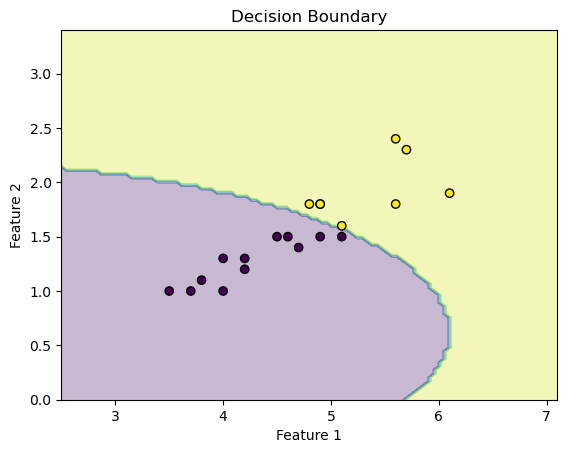

In [40]:
simple_plot_decision_boundary(sklearn_classifier, X_test, y_pred_nb)

In [42]:
calculate_metrics(y_test - 1, sklearn_ys_pred - 1)

{'confusion_matrix': array([[11,  1],
        [ 1,  7]]),
 'accuracy': 0.9,
 'precision': 0.875,
 'recall': 0.875,
 'f1_score': 0.875}

We see that the decision boundaries and evaluation metrics are exactly as same as our implementation of naive bayes, indicating that our implementation works perfectly.